# 1. Importing libraries and Bigquery

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

conn = sqlite3.connect(":memory:")

# 2. Data Exploration

In [229]:
df = pd.read_csv("/content/e-commerce shipping.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


**Explanation for the columns of the data**
1. ID: ID Number of Customers.
2. Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E,F.
3. Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
4. Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
5. Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
6. Cost of the product: Cost of the Product in US Dollars.
7. Prior purchases: The Number of Prior Purchase.
8. Product importance: The company has categorized the product in the various parameter such as low, medium, high.
9. Gender: Male and Female.
10. Discount offered: Discount offered on that specific product.
11. Weight in gms: It is the weight in grams.
12. Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [230]:
df.to_sql("ecommerceshipping",  conn, if_exists="replace") #converting data for use in SQL

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [232]:
df.shape

(10999, 12)

Data has 11 features and these features has 10999 values. Datatypes for ID, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Discount_offered, Weight_in_gms and Reached.on.Time_Y.N columns are integer and the other columns has string datatype.

In [233]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

The data doesn't contain any null value.

In [234]:
df.duplicated().sum()

0

Data doesn't have any duplicated value.

**Numerical Data**

In [235]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


As we can see from the descriptive analysis for the numerical data we can make some observation: 
1. Customer care calls has range of 2 to 7
2. Mean value of customer rating is 3
3. Cost of the product has range of 96 to 310 dolars
4. Mean value of discount offer is 13
5. Weight of the products has range of 1 kg to 7 kg
6. Mean value of products reached on time is 0.6. 

We will explore these relationships deeply in the continuation of the study.

**Categorical Data**

In [236]:
df.describe(include='object')

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


As we can see from the descriptive analysis for the categorical data we can make some observation:
1. Data contains 5 unique block and most frequent warehouse block is F.
2. Data contains 3 unique shipment mode and most frequent mode is ship.
3. Data contais 3 different level for product importance. 
4. Female is most frequent gender among the data.

# 3. Data Preprocessing

For make the data processing simple we chance the Reached.on.Time_Y.N column to Reached_on_Time.

In [237]:
df.rename(columns={"Reached.on.Time_Y.N": "Reached_on_Time"},inplace=True)

In [238]:
df['Reached_on_Time'] = df['Reached_on_Time'].replace([0,1],[1,0]) #replacing 0 to 1 and 1 to 0 on reached on time column, cause we want to 1 represent reached on time.

## 3.1 Outlier detection

In [239]:
df_numeric= df[['Customer_care_calls',	'Customer_rating'	,'Cost_of_the_Product',	'Prior_purchases',	'Discount_offered',	'Weight_in_gms']] #numerical columns

In [240]:
outliers_list = []
for column in df[['Customer_care_calls',	'Customer_rating'	,'Cost_of_the_Product',	'Prior_purchases',	'Discount_offered',	'Weight_in_gms']].columns:
  Selected_column = df_numeric[column]
  q1 = Selected_column.quantile(0.25) # for select first quartile
  q3 = Selected_column.quantile(0.75) # for select third quartile
  iqr = q3 - q1 # this is interquartile range
        
  upper_limit = q3 + 1.5 * iqr
  lower_limit = q1 - 1.5 * iqr
  for outliers in Selected_column:
    if (outliers > upper_limit) or (outliers < lower_limit):
      outliers_list.append(outliers)    
  print('For', column, 'total outlier is: ', len(outliers_list))

For Customer_care_calls total outlier is:  0
For Customer_rating total outlier is:  0
For Cost_of_the_Product total outlier is:  0
For Prior_purchases total outlier is:  1003
For Discount_offered total outlier is:  3212
For Weight_in_gms total outlier is:  3212


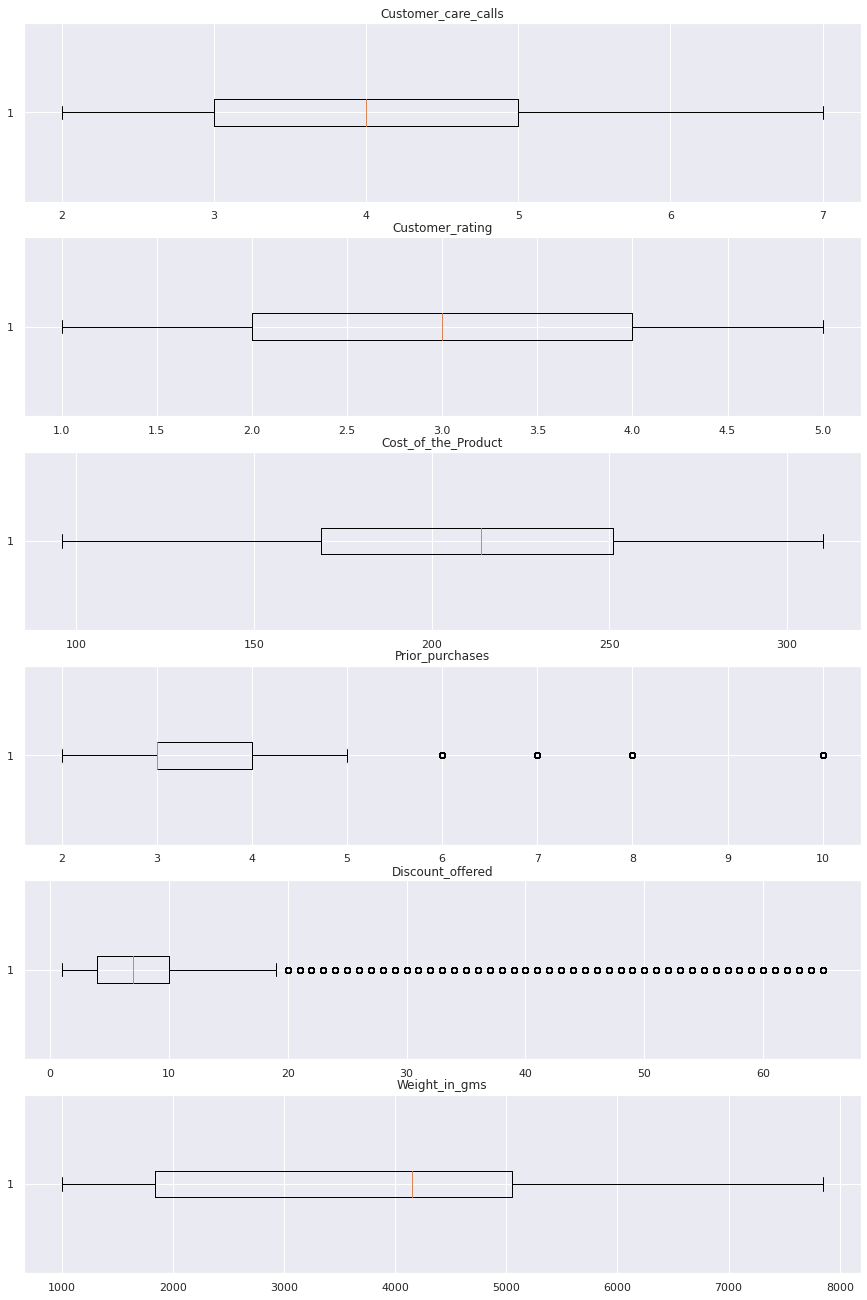

In [241]:
fig, ax = plt.subplots(6, 1, figsize=(15, 23))
i= 0
for column in df[['Customer_care_calls',	'Customer_rating'	,'Cost_of_the_Product',	'Prior_purchases',	'Discount_offered',	'Weight_in_gms']].columns:
  ax[i].boxplot(df.loc[:, column], vert=False)
  ax[i].set_title(column)
  i +=1

There are some outliers on the discount offered and prior purchases columns on the dataset but these outliers seem to be reasonable. Therefore won't be deleted.

# 4. Statistical Analysis


## 4.1 T-Test

In [242]:
from scipy import stats

We apply t-test to explore with statistical aspect if any notible difference between spending of products for female and male. To make the t test we determine two hypothesis and confidence level.

1. Null Hypothesis: Female and males have the same spending cost of the products.

2. Alternative Hypothesis: They have different spending cost for product they bought. One spends much more than the other.

3. Confidence Level: 95%

In [243]:
female = df[df['Gender'] == 'F']
male = df[df['Gender'] == 'M']

In [244]:
stats.ttest_ind(female['Cost_of_the_Product'], male['Cost_of_the_Product'], nan_policy='omit')

Ttest_indResult(statistic=-2.0725011210275626, pvalue=0.03824197576592565)

Our p-value result of 2 sample independent t-test is not higher than 1-0.95(0.05) so that we can reject the null hypothesis. Additionally we can derivate from the t test statistic result that spending of male's is higher than females.

We want to analyse deeply for shipment methods and compare their weight that they can carry. So we again use t-test for this analysis. In this time we choose flight and ship for the analysis.

1. Null Hypothesis: Ship and flight can carry same amount of weight.

2. Alternative Hypothesis: Ship and flight have different capacity to carry products.

3. Confidence Level: 95%

In [245]:
flight = df[df['Mode_of_Shipment'] == 'Flight']
ship = df[df['Mode_of_Shipment'] == 'Ship']

In [246]:
stats.ttest_ind(flight['Weight_in_gms'], ship['Weight_in_gms'], nan_policy='omit')

Ttest_indResult(statistic=-0.04813987587705591, pvalue=0.9616058074342659)

As the result we don't have enough evidence to reject the null hypothesis becuase out p-value is not higher than 0.05.


## 4.2 Correlation matrix and test

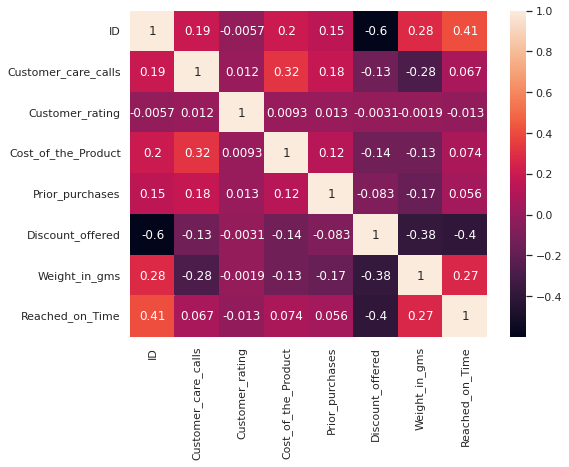

In [247]:
fig = plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)

Observations from correlation matris; there is few strong correlation between features. 
These are:
1. Reached on Time - Discount Offered (0.40)
2. Customer Care Calls - Cost of The Product (0.32)
3. Weight of The Product in Grams - Discount Offered (-0.38)

We will dive into it later on this colab.

# 5. Data Visualization and Analysis

## 5.1 Numerical Data Analysis

I plot a histogram to observe the scale of the company's product cost.

Text(0, 0.5, 'Number of the Products')

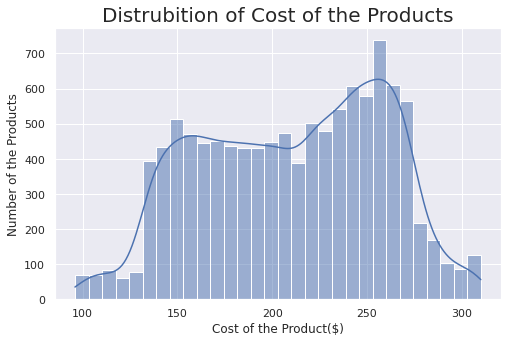

In [248]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data = df, x="Cost_of_the_Product", kde=True, palette="Pastel2")
plt.title("Distrubition of Cost of the Products", size=20)
plt.xlabel("Cost of the Product($)")
plt.ylabel("Number of the Products")

As we can derived from the plot, company's has range of 100 to 300 dollar product cost moreover costs show a peak of around $250.

Text(0, 0.5, 'Number of the Products')

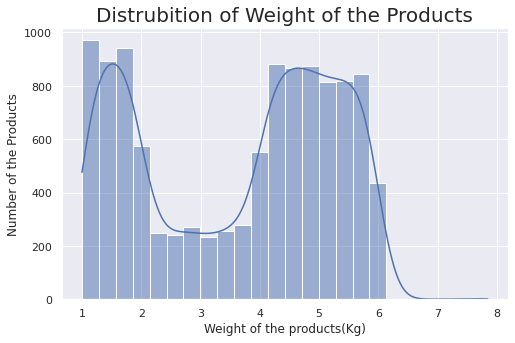

In [249]:
fig, ax = plt.subplots(figsize=(8, 5))
df2 = df[["Weight_in_gms"]] / 1000
sns.histplot(data = df2, x="Weight_in_gms", kde=True, palette="Pastel2")
plt.title("Distrubition of Weight of the Products", size=20)
plt.xlabel("Weight of the products(Kg)")
plt.ylabel("Number of the Products")

After analyzing the distribution of the prices, we carry on to weight of the products. It's shown that the company sells relatively small products that range from 1 to 8 kg. We can clearly see that weight 1 to 2 kg is more common among the product of the company.

## 5.2 Categorical Data Analysis

After understanding of basic information of the company's data we continue with categorical data analysis to see what is the relationship between the categorical data.

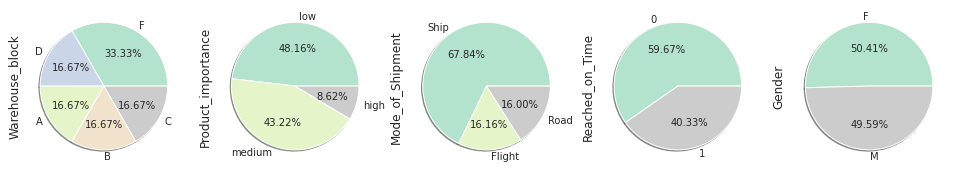

In [250]:
cat_data = df[['Warehouse_block','Product_importance','Mode_of_Shipment','Reached_on_Time','Gender']]
i = 1
plt.figure(figsize=(20,12))
for col in cat_data:
    plt.subplot(3,6,i)
    x = cat_data[col].value_counts()
    plot = x.plot.pie(fontsize=10, autopct='%.2f%%', cmap= 'Pastel2', shadow = True)
    i +=1

Observations:

1.   Warehouse block F deliver much more product than the others. We can make inferences that, F blok can be bigger or there is a correlation between reach on time and F block or maybe F block's location is closer to the destination points.
2.   91% products are medium to low importance. Maybe there is a correlation between cost of the product and product importance. (we will explore this later.)
3. We can cleary say that ship delivers much more products than other shipment methods.
4. Almost 60% of the products not reach on time. Maybe there is a correlation between mode of shipment and reach on time. (we will explore this later.)
5. Contrary to popular belief, the gender distribution is almost equal. Analyzing gender distribution is critical for marketing strategies.

### 5.2.1 Warehouse block analysis

We have an estimate that there is a correlation between reached on time and warehouse block, because of that we plot and analyze the mean value for each warehouse block. 

In [251]:
df.groupby('Warehouse_block')[['Reached_on_Time']].mean()

,Reached_on_Time
Warehouse_block,
A,0.413530
B,0.397709
C,0.403164
D,0.402399
F,0.401528


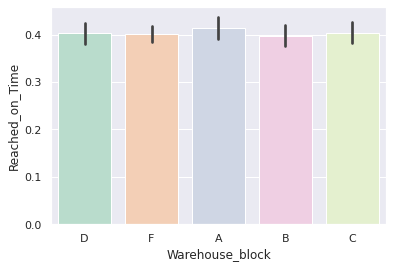

In [252]:
sns.set_theme(style="darkgrid")
sns.barplot(x='Warehouse_block', y='Reached_on_Time', data=df, palette="Pastel2")

Thus there is no notable difference between warehouse blocks. In the situation of the campaign period, we can use all of the warehouse blocks without any hesitation. Other assumptions we made can be true however we don't have enough data to analyze them.

### 5.2.2 Shipment Mode Analysis

The aim and motivation to make an pivot table of shipment mode is to see if there is a difference between the weight of the products they can carry and the prices of the products they carry. Furthermore, we search into the question that why the ship is the preferable mode.

In [253]:
shipment = df.loc[:,['Mode_of_Shipment','Cost_of_the_Product','Weight_in_gms', 'Product_importance']]
shipment_table = pd.pivot_table(shipment, index=['Mode_of_Shipment']
        ,values=['Mode_of_Shipment','Cost_of_the_Product','Weight_in_gms']
                 ,aggfunc = { 'Mode_of_Shipment': np.size,
                              'Cost_of_the_Product':np.sum,
                              'Weight_in_gms':np.sum}     
                      )

shipment_table.rename(columns={"Mode_of_Shipment": "Count_of_products"},inplace=True)
shipment_table['Average_Package_Weight'] = round((shipment_table.Weight_in_gms / shipment_table.Count_of_products),2)
shipment_table['%Weigh_of_Products'] = np.round((shipment_table.Average_Package_Weight / shipment_table.Average_Package_Weight.sum() * 100),3).astype(str) + '%'
shipment_table['Average_Package_Cost'] = round((shipment_table.Cost_of_the_Product / shipment_table.Count_of_products),2)
shipment_table['%Cost_of_Products'] = np.round((shipment_table.Average_Package_Cost / shipment_table.Average_Package_Cost.sum() * 100),3).astype(str) + '%'
shipment_table

,Cost_of_the_Product,Count_of_products,Weight_in_gms,Average_Package_Weight,%Weigh_of_Products,Average_Package_Cost,%Cost_of_Products
Mode_of_Shipment,,,,,,,
Flight,371938,1777,6449405,3629.38,33.265%,209.31,33.217%
Road,370437,1760,6423209,3649.55,33.45%,210.48,33.403%
Ship,1569580,7462,27097936,3631.46,33.284%,210.34,33.38%


As we can see from the pivot table there is no notable difference between the shipment method according to the weight they can carry and the cost of the product they carry. Moreover, maybe there is a chance that ship can carry more products in one time so that's why ship delivers more product than other methods. Thus, ship can be a preferable mode for the campaign period.

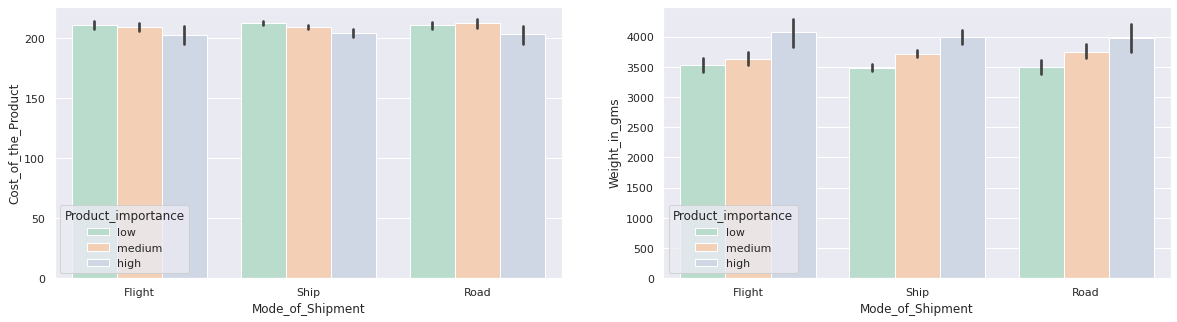

In [254]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.barplot(x='Mode_of_Shipment',y= 'Cost_of_the_Product',hue='Product_importance',data=df, palette="Pastel2", ax=ax[0])
sns.barplot(x='Mode_of_Shipment',y= 'Weight_in_gms',hue='Product_importance',data=df, palette="Pastel2", ax=ax[1])

Text(0, 0.5, 'Average time of arrival')

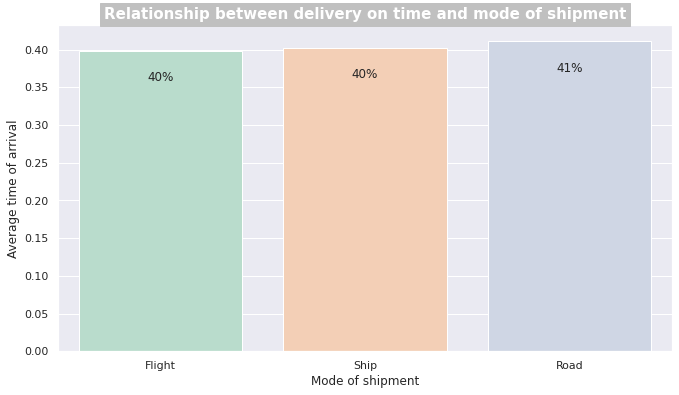

In [255]:
fig, ax = plt.subplots(figsize=(11,6))
sns.barplot(x='Mode_of_Shipment', y='Reached_on_Time', data=df, palette="Pastel2", ax=ax, ci=None)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*0.9), ha='center')
plt.title("Relationship between delivery on time and mode of shipment", size=15, backgroundcolor='silver', color='white', fontweight="bold", fontname="Times New Roman")
plt.xlabel("Mode of shipment")
plt.ylabel("Average time of arrival")

We can say from the plots that there is almost no notable difference between shipment methods but there is some correlation between product importance and cost of the product; product importance and weight of the products.

### 5.2.3 Product importance

In [256]:
pd.read_sql("""
            SELECT Product_importance, Avg(Cost_of_the_Product) AS Avg_price
            FROM ecommerceshipping
            GROUP BY Product_importance
            ORDER BY Avg_price DESC
        
            """
,conn)

,Product_importance,Avg_price
0,low,212.059845
1,medium,209.382415
2,high,203.871308


Text(0.5, 0, 'Product importance')

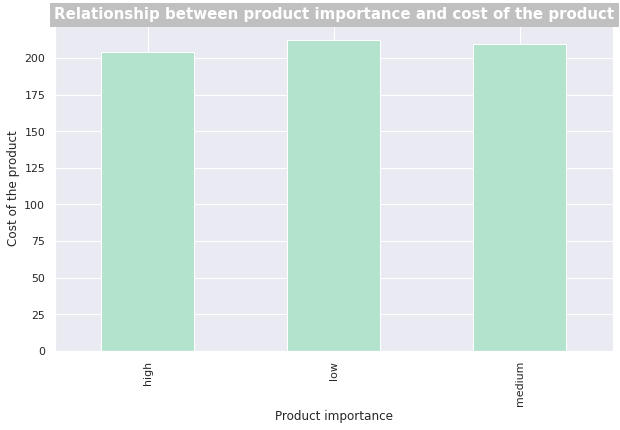

In [257]:
pd.pivot_table(df, index="Product_importance", values="Cost_of_the_Product", aggfunc= np.mean).plot(kind='bar', cmap="Pastel2", figsize=(10,6), legend=False)
plt.title("Relationship between product importance and cost of the product", size=15, backgroundcolor='silver', color='white', fontweight="bold", fontname="Times New Roman")
plt.ylabel("Cost of the product")
plt.xlabel("Product importance")

As we can see from the SQL query and the plot, surprisingly low product importance degree has higher product price than others.

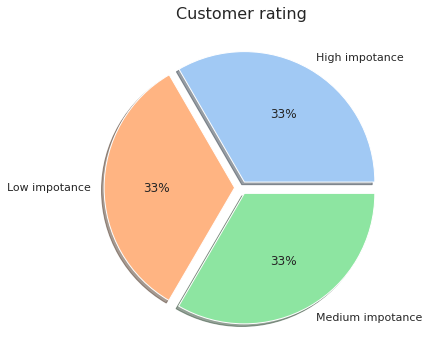

In [258]:
fig, ax = plt.subplots(figsize=(10, 6))
high_importance = df[df["Product_importance"] == 'high'].Customer_rating.mean()
low_importance = df[df["Product_importance"] == 'low'].Customer_rating.mean()
medium_importance = df[df["Product_importance"] == 'medium'].Customer_rating.mean()

rating_data = [high_importance, low_importance, medium_importance]
labels = ['High impotance', 'Low impotance', 'Medium impotance']
colors = sns.color_palette('pastel')[0:3]

plt.pie(rating_data, labels = labels, autopct='%.0f%%',  explode = [0.05, 0.05, 0.05], shadow = True, colors= colors)
plt.title("Customer rating",fontsize=16)
plt.show()

Our second analysis is to find product importance correlation but as we can see from the pie chart there is no correlation between product importance and customer rating. Customers' rating is independent of the importance of the product which tells us we should make more analysis to find connections about customer's rate to increase the company's quality.

Text(0, 0.5, 'Average reached on time')

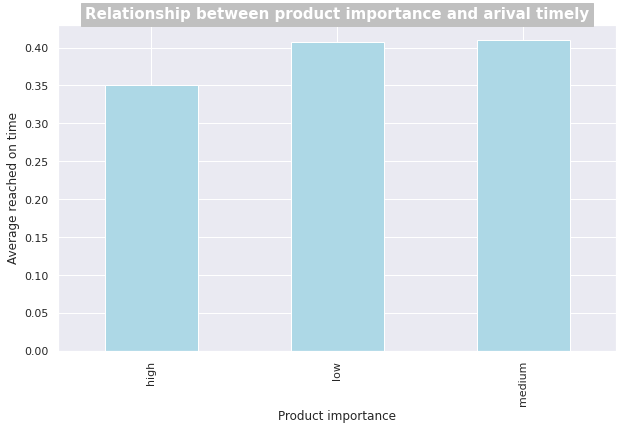

In [259]:
pd.pivot_table(df, index="Product_importance", values="Reached_on_Time", aggfunc= np.mean).plot(kind='bar', color = ['lightblue'], figsize=(10,6), legend=False)
plt.title("Relationship between product importance and arival timely", size=15, backgroundcolor='silver', color='white', fontweight="bold", fontname="Times New Roman")
plt.xlabel("Product importance")
plt.ylabel("Average reached on time")

Finally, we have data to understand some information about product importance. Products tagged high importance not reached on time according to the low  and medium importance product. This situation poses a significant problem for the company.


### 5.2.4 Customer Care Calls Analysis

To see how many calls have been made during the shipment process we write a query and make a plot to visualize.

Text(0.5, 0, 'Customer care calls')

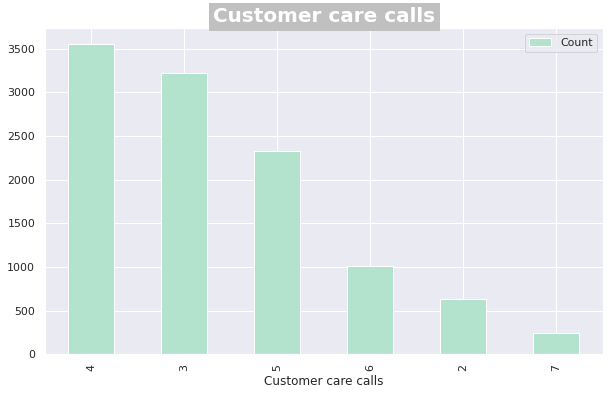

In [260]:
customer_care_calls_data = pd.read_sql("""
                                            SELECT Customer_care_calls, Count(*) AS Count
                                            FROM `ecommerceshipping`
                                            GROUP BY Customer_care_calls
                                            ORDER BY Count DESC
                                        
                                            """
,conn)
fig, ax = plt.subplots(figsize=(10, 6))
customer_care_calls_data.set_index("Customer_care_calls").plot(kind='bar', cmap="Pastel2", ax=ax)
plt.title("Customer care calls", size=20, backgroundcolor='silver', color='white', fontweight="bold", fontname="Times New Roman")
plt.xlabel("Customer care calls")

The frequent number of calls is 4 calls and 3 calls are also frequent but the less frequent calls are 2 and 7 calls. The company would expect to receive 3 to 5 calls during the shipment process. We can also conclude that after four calls, customers' query starts decreasing.

We want to explore the relationship between customer care calls and the cost of the product so we do a pivot table and visualize.

In [261]:
ccs_pivot_table = pd.pivot_table(df, values = "Cost_of_the_Product", index = "Customer_care_calls", aggfunc= np.mean)
ccs_pivot_table

,Cost_of_the_Product
Customer_care_calls,
2,189.888715
3,198.876904
4,206.396964
5,214.328608
6,246.478776
7,277.337398


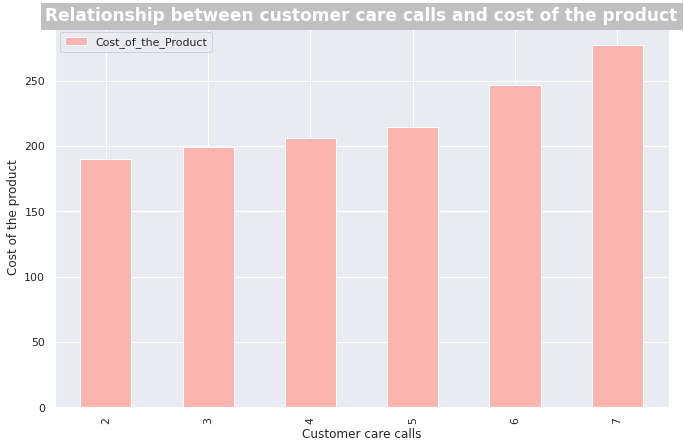

In [262]:
fig, ax = plt.subplots(figsize=(11,7))
ccs_pivot_table.plot(kind='bar', cmap="Pastel1", ax=ax)
plt.title("Relationship between customer care calls and cost of the product", size=17, backgroundcolor='silver', color='white', fontweight="bold", fontname="Times New Roman")
ax.set_ylabel("Cost of the product")
ax.set_xlabel("Customer care calls")
plt.show()

As seen above, it is clearly seen that as the price of the product increases, the number of customer service calls increases. It means that customer gets more anxious when they buy expensive products and tend to call customer care more often.

### 5.2.5 Customer Rating Analysis

To see if customers are pleased with the company we consider the 3 and higher rate as high rating, rating of 1 and 2 as low rating.

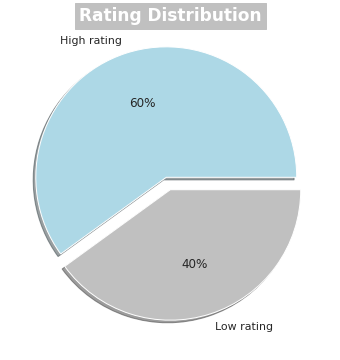

In [263]:
fig, ax = plt.subplots(figsize=(10, 6))
high_rating = df[df["Customer_rating"] >= 3]
low_rating = df[df["Customer_rating"] < 3]

rating_data = [len(high_rating), len(low_rating)] #having the number of customers to plot.
labels = ['High rating', 'Low rating']
colors = ['lightblue','silver']

plt.pie(rating_data, labels = labels, autopct='%.0f%%', colors=colors, explode = [0.1, 0], shadow = True)
plt.title("Rating Distribution", size=17, backgroundcolor='silver', color='white', fontweight="bold", fontname="Times New Roman")
plt.show()

We can say 60% of the customers are pleased with the company but %40 of the customers are not happy. To understand customer rating we are willing to make some observation between reached on time and customer rating.

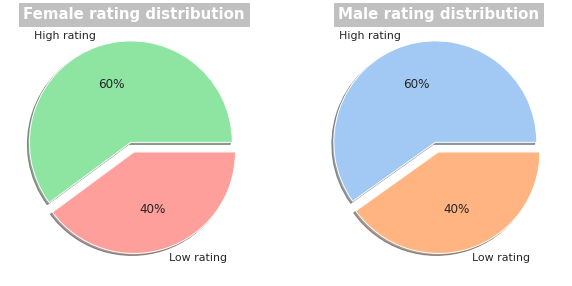

In [264]:
Female = df[df["Gender"] == "F"]
Male = df[df["Gender"] == "M"]
Female_high_rating = high_rating[high_rating["Gender"] == 'F']
Male_high_rating = high_rating[high_rating["Gender"] == 'M' ]

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
Female_data = [len(Female_high_rating), len(Female)-len(Female_high_rating)]
Male_data = [len(Male_high_rating), len(Male)-len(Male_high_rating)]
labels = ['High rating', 'Low rating']
colors = sns.color_palette('pastel')[0:2]
colors2 = sns.color_palette('pastel')[2:4]

ax[0].pie(Female_data, labels = labels, autopct='%.0f%%', colors=colors2, shadow = True, explode = [0.1, 0])
ax[0].set_title("Female rating distribution", size=15, backgroundcolor='silver', color='white', fontweight="bold", fontname="Times New Roman")
ax[1].pie(Male_data, labels = labels, autopct='%.0f%%', colors=colors, shadow = True, explode = [0.1, 0])
ax[1].set_title("Male rating distribution", size=15, backgroundcolor='silver', color='white', fontweight="bold", fontname="Times New Roman")
plt.show()

It is shown that gender no matter in rating.

In [265]:
pd.read_sql("""

            SELECT Customer_rating, Count(*) AS Count
            FROM ecommerceshipping
            GROUP BY Customer_rating
            ORDER BY Count DESC
                                        
            """
,conn)

,Customer_rating,Count
0,3,2239
1,1,2235
2,4,2189
3,5,2171
4,2,2165


We can derive from rating 3 is most common among the customers, after that rating 1 comes.

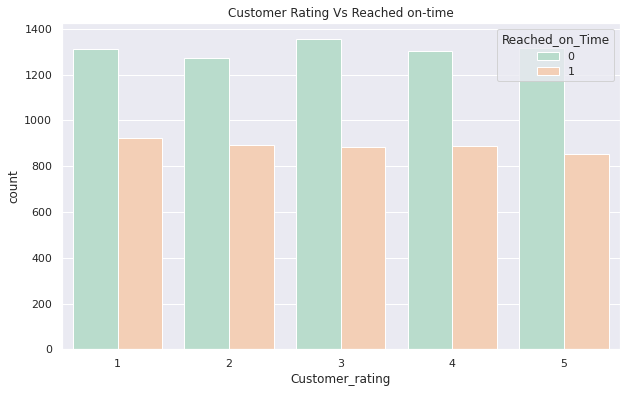

In [266]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x = "Customer_rating", data = df, palette = "Pastel2", hue="Reached_on_Time", ax=ax);
plt.title('Customer Rating Vs Reached on-time')
plt.show()

Inference: 
There is no strong correlation between customer rating, reached on time and cost of the product. 

### 5.2.6 Prior Purchases Analysis

Text(0.5, 0, 'Prior purchases of customers')

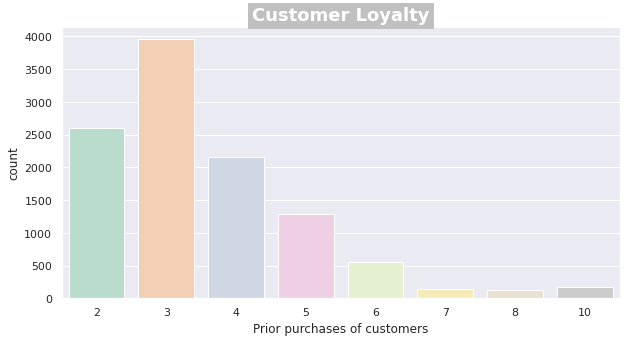

In [267]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x = "Prior_purchases", data = df, ax=ax, palette="Pastel2")
plt.title("Customer Loyalty", size=18, backgroundcolor='silver', color='white', fontweight="bold", fontname="Times New Roman")
plt.xlabel("Prior purchases of customers")

Inference:
1. We can clearly say that most of the company's' customers made 3 purchases before this means that it's their fourth time's shopping. 
2. After the fourth purchase, customers' loyalty to the company decreased.
3. After the fourth shopping, customers can increase their loyalty to the company by making a special campaign.


Based on our loyal customer assumption, we refer to customers who have made 4 prior purchases and more as loyal customers. The average of the scores they gave in this way was surprisingly equal.

In [268]:
loyal= df[df["Prior_purchases"] >= 4]
unloyal = df[df["Prior_purchases"] < 4]

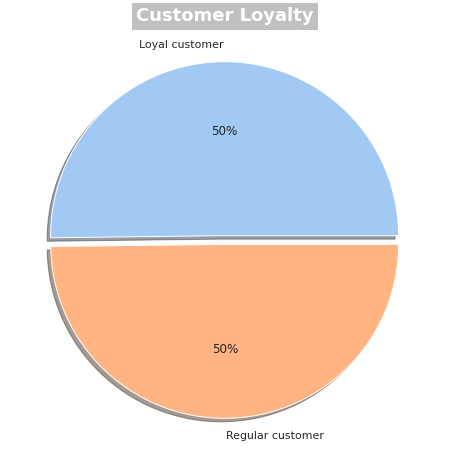

In [269]:
fig, ax = plt.subplots(figsize=(8, 8))
loyal_data = [loyal.Customer_rating.mean(), unloyal.Customer_rating.mean()]
labels = ['Loyal customer', 'Regular customer']
colors = sns.color_palette('pastel')[0:2]
plt.pie(loyal_data, labels = labels, autopct='%.0f%%', colors=colors, explode = [0.05, 0], shadow = True)
plt.title("Customer Loyalty", size=18, backgroundcolor='silver', color='white', fontweight="bold", fontname="Times New Roman")
plt.show()

### 5.2.7 Gender Analysis

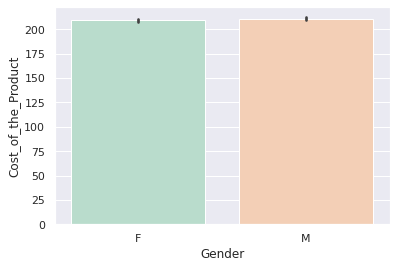

In [270]:
sns.barplot(x='Gender', y='Cost_of_the_Product', data=df,  palette="Pastel2")

It was wanted to examine the prices of the products purchased by male and female customers to be used during the campaign period. But no significant difference was observed according to the graph however for the t-test value result there is a difference between the male and female customers and the spending of males is higher than females.

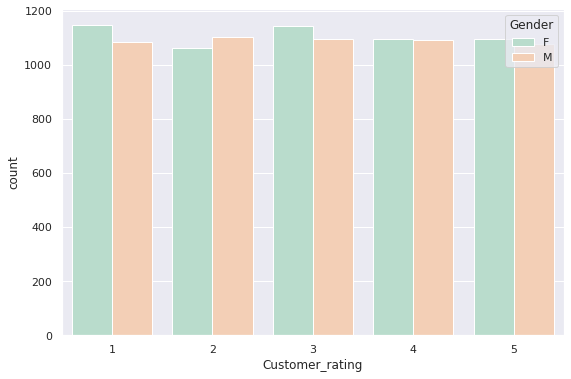

In [271]:
fig, ax = plt.subplots(figsize=(9,6))
sns.countplot(x = df["Customer_rating"], hue = df["Gender"], palette="Pastel2", ax=ax)

In [272]:
Female = df[df["Gender"] == "F"]
Female_rating = Female[Female["Customer_rating"] == 1]
Male = df[df["Gender"] == "M"]
Male_rating = Male[Male["Customer_rating"] == 1]

print("Difference between the female and male customers who rates 1 point: ", str(round((len(Female_rating) / len(Female)* 100) - (len(Male_rating) / len(Male)* 100),2)) + "%")


Difference between the female and male customers who rates 1 point:  0.81%


According to the graph, the rating ratios of the genders are almost the same. Therefore, we can say that gender does not matter in rating. 

To search which gender is more loyal to the company according to our loyal customer assumption we plot a pie chart.

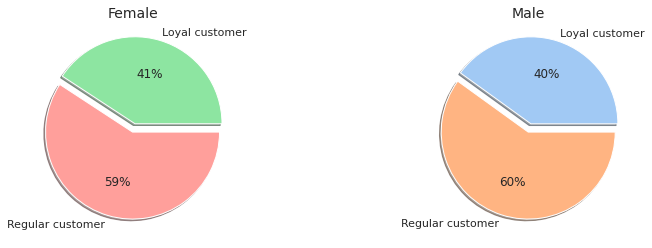

In [273]:
Female = df[df["Gender"] == "F"]
Male = df[df["Gender"] == "M"]
Female_loyalty = Female[Female["Prior_purchases"] >= 4]
Male_loyalty = Male[Male["Prior_purchases"] >= 4]

fig, ax = plt.subplots(1, 2, figsize=(13, 4))
Female_data = [len(Female_loyalty), len(Female)-len(Female_loyalty)]
Male_data = [len(Male_loyalty), len(Male)-len(Male_loyalty)]
labels = ['Loyal customer', 'Regular customer']
colors = sns.color_palette('pastel')[0:2]
colors2 = sns.color_palette('pastel')[2:4]

ax[0].pie(Female_data, labels = labels, autopct='%.0f%%', colors=colors2, shadow = True, explode = [0.1, 0])
ax[0].set_title("Female",fontsize=14)
ax[1].pie(Male_data, labels = labels, autopct='%.0f%%', colors=colors, shadow = True, explode = [0.1, 0])
ax[1].set_title("Male",fontsize=14)
plt.show()

Female customers tend to be more loyal to the male customer with 1% difference.

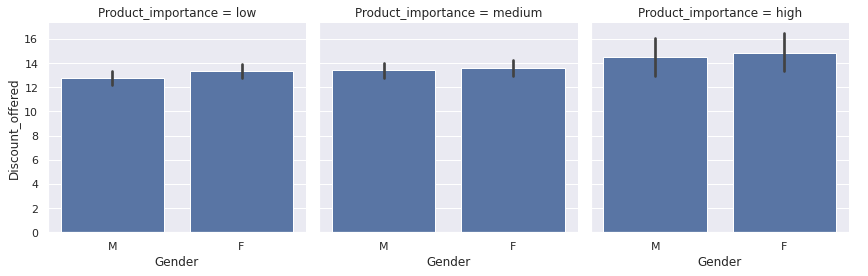

In [274]:
g=sns.FacetGrid(data=df,col='Product_importance',height=4)
g=g.map(sns.barplot,'Gender','Discount_offered',order=['M','F']);
g.add_legend();

Products with high importance tend to have higher discount, and in this product category women tend to have higher discounts than men

### 5.2.8 Discount Offer Analysis

Text(0.5, 1.0, 'Discound Distrubition')

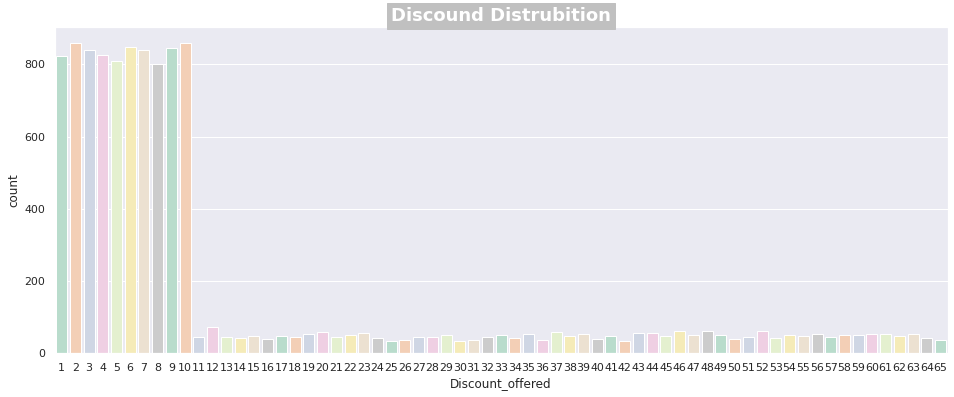

In [275]:
fig = plt.subplots(figsize = (16,6))
sns.countplot(x=df["Discount_offered"], palette='Pastel2')
plt.title("Discound Distrubition", size=18, backgroundcolor='silver', color='white', fontweight="bold", fontname="Times New Roman")

This chart is important for understanding the company's discount distribution. It can be deduced from the chart that the company does not tend to discount more than 10%, and it may be concluded that discounts of more than 10% are made for a special occasion. These special cases may be during the campaign period or more than 10% discount may be given to new customers.

The graphic below is made to examine the relationship between the discount and the timely delivery of the product.

Text(0.5, 0, '%Discount offered')

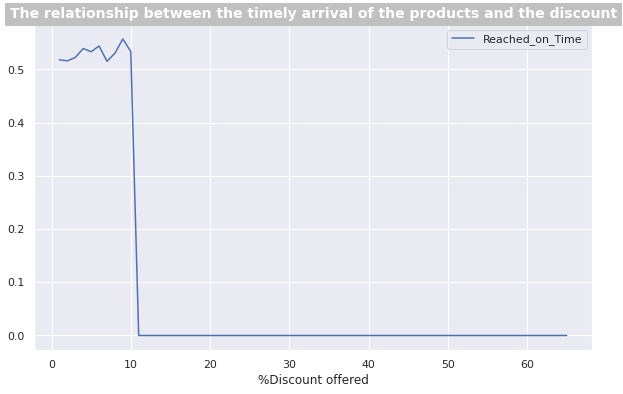

In [276]:
pd.pivot_table(df, index= "Discount_offered", values="Reached_on_Time").plot(figsize = (10,6))
plt.title("The relationship between the timely arrival of the products and the discount", size=14, backgroundcolor='silver', color='white', fontweight="bold", fontname="Times New Roman")
plt.xlabel("%Discount offered")

Products with 10% discount or less have a high timely delivery rate, but products with more than 10% discount have not been delivered on time. This may be because purchases with more than 10% are rare and made for special occasions. These special cases may be big campaign periods and orders may be delivered late due to the intensity that occurs during these campaign periods.

The graph below has been made to examine the discount rate and the weight relationship of the products.

Text(0.5, 1.0, 'The relationship between discounts and discounts of products')

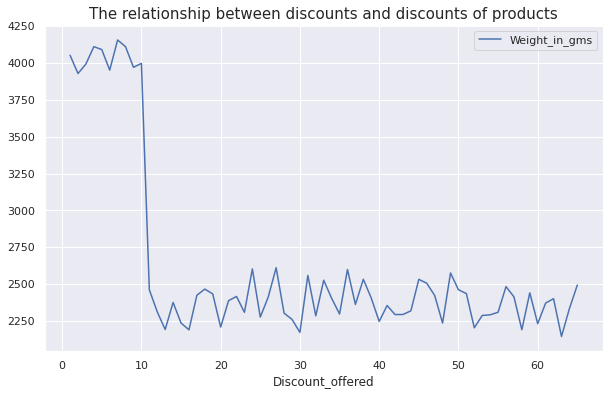

In [277]:
pd.pivot_table(df, index= "Discount_offered", values="Weight_in_gms", aggfunc = np.mean).plot(figsize = (10,6))
plt.title("The relationship between discounts and discounts of products", size=15)

The weight of the products with more than 10% discount is higher than the ones with less than 10%, but since the difference is 2 kg, it would not be correct to make a comment based on the available data.

# 6. Conclusion and Recommendation

1. The first thing that needs improvement in the firm is that orders are not delivered on time.
2. The company needs to pay attention to the customer that gives a low rating.
3. The firm should focus on ensuring order continuity of customers.